In [1]:
# Exercise 3 Steganography: Caesar meets Vigenère

In [5]:
import matplotlib.pyplot as plt
import numpy as np
from skimage.io import imshow

import ast
import itertools

from helper import *

In [6]:
params = load_params('params.txt')

Q3_img = params['Q3_img']
Q3a_ct = params['Q3a_ct']
Q3b_ct = params['Q3b_ct']

Q3_img = ast.literal_eval(Q3_img)

In [10]:
# Question 3.1 : Decrypt Q3a_ct

def caesar_char(cipher_c, shift):
    if cipher_c < 'a' or cipher_c > 'z':
        return cipher_c
    else:
        return chr((ord(cipher_c) - ord('a') + shift) % 26 + ord('a'))

def show_all_caesar_possibilties(cipher):
    for shift in range(1, 26):
        plaintext = [caesar_char(c, shift) for c in cipher][:50]
        print(shift, ''.join(plaintext))


#print('Q3a_ct={}'.format(Q3a_ct))
show_all_caesar_possibilties(Q3a_ct)
print()
# The decryption algorithm under which Q3a_ct was encrypted is the Caesar cipher technique with a shift of 22

key = 9
plaintext = ''.join([caesar_char(c, key) for c in Q3a_ct])
print('Q3a_sk={}'.format(key))
print('decrypted with {}, encrypted with {}'.format(key, 26 - key))
print('hint: {}'.format(plaintext))

1 lg lscw qgm xjge lzw fayzl lg lzw kcq qgm fwwv lg 
2 mh mtdx rhn ykhf max gbzam mh max ldr rhn gxxw mh 
3 ni nuey sio zlig nby hcabn ni nby mes sio hyyx ni 
4 oj ovfz tjp amjh ocz idbco oj ocz nft tjp izzy oj 
5 pk pwga ukq bnki pda jecdp pk pda ogu ukq jaaz pk 
6 ql qxhb vlr colj qeb kfdeq ql qeb phv vlr kbba ql 
7 rm ryic wms dpmk rfc lgefr rm rfc qiw wms lccb rm 
8 sn szjd xnt eqnl sgd mhfgs sn sgd rjx xnt mddc sn 
9 to take you from the night to the sky you need to 
10 up ublf zpv gspn uif ojhiu up uif tlz zpv offe up 
11 vq vcmg aqw htqo vjg pkijv vq vjg uma aqw pggf vq 
12 wr wdnh brx iurp wkh qljkw wr wkh vnb brx qhhg wr 
13 xs xeoi csy jvsq xli rmklx xs xli woc csy riih xs 
14 yt yfpj dtz kwtr ymj snlmy yt ymj xpd dtz sjji yt 
15 zu zgqk eua lxus znk tomnz zu znk yqe eua tkkj zu 
16 av ahrl fvb myvt aol upnoa av aol zrf fvb ullk av 
17 bw bism gwc nzwu bpm vqopb bw bpm asg gwc vmml bw 
18 cx cjtn hxd oaxv cqn wrpqc cx cqn bth hxd wnnm cx 
19 dy dkuo iye pbyw dro xsqrd dy dro 

In [13]:
# Question 3.2 : Decrypt Q3b_ct

def frequencies(text):
    counters = {}
    for c in text:
        counters[c] = counters.get(c, 0) + 1
    return sorted(counters.items(), key=lambda x: x[1], reverse=True)


def vigenere(text, key):
    key_repeated = key * ceil(len(text) / len(key))
    return ''.join([caesar_char(text[index], ord('a') - ord(key_repeated[index])) for index in range(len(text))])
    

def frequent_pattern(text, length):
    counters = {}
    for index in range(len(text) - length):
        pattern = text[index:index + length]
        counters[pattern] = counters.get(pattern, 0) + 1
    return sorted(filter(lambda x: x[1] > 1, counters.items()), key=lambda x: x[1], reverse=True)

    
def index_coincidence(text):
    total = 0.0
    n = float(len(text))
    for (c, nc) in frequencies(text): 
        total += (nc * (nc - 1)) / (n * (n - 1))
    return total


def find_maximum_index_coincidence(text):
    best_index = 0.0
    best_key_len = -1
    for key_len in range(1, 8):
        columns = []
        for col in range(key_len):
            columns.append(index_coincidence(''.join([text[index] for index in range(len(text)) if index % key_len == col])))
        # compute the index of coincidence of each columns and use the average
        newIndex = sum(columns) / len(columns)
        print('key_len: {}, newIndex: {}'.format(key_len, newIndex))
        if newIndex > best_index:
            best_index = newIndex
            best_key_len = key_len
    return best_key_len, best_index


def show_all_possible_vigenere_with_key_length(cipher, key_len):
    for key in itertools.product('abcdefghijklmnopqrstuvwxyz', repeat=key_len):
        plaintext = vigenere(cipher, key)
        print('key: {}, plaintext: {}'.format(key, plaintext))

        
#print(frequencies(Q3b_ct))
#print(frequent_pattern(Q3b_ct, 2))
#print('Q3b_ct={}'.format(Q3b_ct))
#best_key_len, best_index = find_maximum_index_coincidence(Q3b_ct)
#print('key len: {}, index of coincidence : {}'.format(best_key_len, best_index))
#show_all_possible_vigenere_with_key_length(Q3b_ct, best_key_len)
#print()

# The decryption algorithm under which Q3b_ct was encrypted is the Vigenere cipher technique the key 'y'
#key = 'y'
#plaintext = vigenere(Q3b_ct, key)
#print(index_coincidence(plaintext))
#print('Q3b_sk={}'.format(plaintext))



# The decryption algorithm under which Q3b_ct was encrypted is the Caesar cipher technique with a shift of 2

#show_all_caesar_possibilties(Q3b_ct)
key = 7
plaintext = ''.join([caesar_char(c, key) for c in Q3b_ct])
print('Q3b_sk={}'.format(key))
print('decrypted with {}, encrypted with {}'.format(key, 26 - key))
print('hint: {}'.format(plaintext))

Q3b_sk=7
decrypted with 7, encrypted with 19
hint: after114yearsthesixthblueskywillrevealitssecretafteropeningthedoorwithlasec


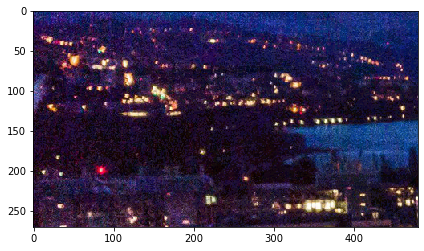

In [6]:
# Question 3.3 : Find hidden English passphrase Q3c_pt

data = np.array(Q3_img, dtype=int) # N x M
data = [(data >> (16 - 8 * i)) & 0xFF for i in range(3)]

img = np.dstack(data).astype(np.uint8) # N x M x 3
plt.plot(), imshow(img)
plt.show()

Q3c_pt=tominglewiththeuniverseandfeel                              


/usr/local/lib/python3.10/dist-packages/skimage/io/_plugins/matplotlib_plugin.py:150: UserWarning: Low image data range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


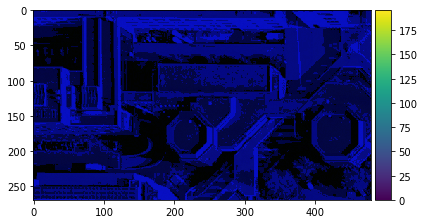

In [7]:
data = np.array(Q3_img, dtype=int) # N x M

# to take you from the night to the sky you need to keep the last three reds.
# the last two greens will give you the two most important blues.
# finally, within the blue the third other blue lie last, preceeded by four greens.

# after 16 years the third blue sky will reveal its secret after opening the door with obiwan

#secret = [(x & 0x04) >> 2 for x in data]
#for i in range(floor(len(secret) / 8)):
#    index = i *8
#    print(chr(ord('a') + int(''.join(x for x in secret[index:index+8]), 2)))

data2 = [
    # keep the last three reds
    ((data >> 16) & 0x07) << 0,
    
    # within the blue the third other blue lie last, preceeded by four greens.
    (data & 0x1e) >> 1,
    
    # the last two greens => two most important blues
    # within the blue the third other blue lie last
    (((data >> 8) & 0x03) << 6) | ((data & 0x01) << 2)
]



# after 16 years the third blue sky will reveal its secret after opening the door with obiwan
data = data & 0x01
line, key = 16, 'obiwan'
line_text = ''
for col in range(floor(480 / 8)):
    index = col * 8
    bits = data[line][index:index+8]
    line_text += chr(int(''.join(str(x) for x in bits), 2))
#print(line_text)
print('Q3c_pt={}'.format(vigenere(line_text, key)))

img = np.dstack(data2).astype(np.uint8) # N x M x 3
plt.plot(), imshow(img)
plt.show()